In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style = "darkgrid")
%matplotlib inline


from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model

from keras.wrappers.scikit_learn import KerasClassifier


from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import *
from keras import backend


from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import HalvingGridSearchCV
#from sklearn.experimental import enable_halving_search_cv
from hyperopt import STATUS_OK
import lightgbm as lgb
from hyperopt import fmin, tpe, Trials


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, r2_score,plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense





In [ ]:
credit_smgrid = pd.read_csv('gdrive/My Drive/Thesis_Research_LJMU/creditcard.csv')
credit_smgrid.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
X = credit_smgrid.drop(['Class'], axis =1)
y = credit_smgrid['Class']

In [ ]:
X_train_ada, y_train_ada = ADASYN().fit_resample(X, y)
y_resample_ada=pd.DataFrame(y_train_ada)
X_resample_ada=pd.DataFrame(X_train_ada)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample_ada, y_resample_ada, test_size = 0.3, random_state=142)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_n = X_train.shape[1]

def ann():
    model = Sequential()
    
    model.add(Dense(65, input_shape=(input_n,), kernel_initializer='he_normal' ,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
    
    
    
    return model

In [ ]:
params = {'batch_size': [25, 32], 'nb_epoch': [10, 20]}

model = KerasClassifier(build_fn = ann, verbose=0)

ann_cv = GridSearchCV(estimator= model, param_grid = params, cv=3, scoring='f1', n_jobs= 6)
ann_cv.fit(X_train, y_train)

print(ann_cv.best_score_)
print("tuned hyperparameters :(best parameters) ",ann_cv.best_params_)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65)                2015      
_________________________________________________________________
dropout (Dropout)            (None, 65)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 3,776
Trainable params: 3,776
Non-trainable params: 0
______________________________________________________

In [ ]:
input_n = X_train.shape[1]
modelsm = Sequential()

modelsm.add(Dense(65, input_shape=(input_n,), kernel_initializer='he_normal' ,activation='relu'))
#model.add(Dropout(0.2))
modelsm.add(Dense(20, activation='relu'))
modelsm.add(Dense(20, activation='relu'))
#modelsm.add(Dropout(0.2))
modelsm.add(Dense(1, activation='sigmoid'))
modelsm.summary()

modelsm.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = modelsm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3)
print(history.history.keys())

#return model

#_,accuracy = model.evaluate(X,y)
#print('Accuracy: %2f' % (accuracy*100))

yhat_probsm = modelsm.predict(X_test, verbose=0)

yhat_classesm = modelsm.predict_classes(X_test, verbose=0)

yhat_probsm = yhat_probsm[:, 0]
yhat_classesm = yhat_classesm[:, 0]


accuracy = accuracy_score(y_test, yhat_classesm)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classesm)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classesm)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classesm)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, yhat_probsm)
print('ROC AUC: %f' % auc)

matrix = confusion_matrix(y_test, yhat_classesm)
print(matrix)

tpr = recall_score(y_test, yhat_classesm)
tnr = recall_score(y_test, yhat_classesm, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 65)                2015      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 3,776
Trainable params: 3,776
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
459/459 [==============================] - 2s 3ms/step - loss: 0.3004 - accuracy: 0.8725 - val_loss: 0.0293 - val_accuracy: 0.9879
Epoch 2/20
459/459 [==============================] - 1s 2ms/step - loss: 0.0287 - accuracy: 0.9904 - val_lo

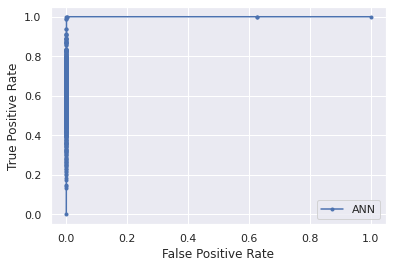

In [ ]:
ann_fpr, ann_tpr, _ = roc_curve(y_test, yhat_probsm)
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

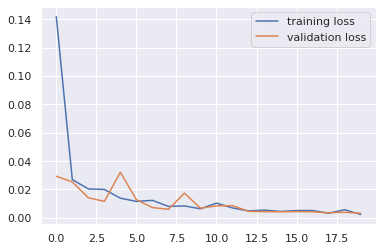

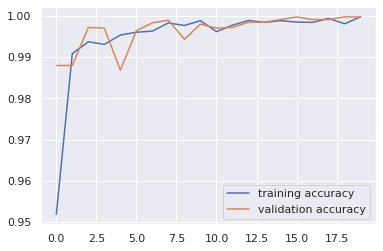

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

plt.show()

In [ ]:
input_n = X_train.shape[1]
modelsm = Sequential()

modelsm.add(Dense(72, input_shape=(input_n,), kernel_initializer='he_normal' ,activation='relu'))
modelsm.add(Dropout(0.25))

modelsm.add(Dense(24, activation='relu'))
modelsm.add(Dense(24, activation='relu'))

modelsm.add(Dropout(0.25))
modelsm.add(Dense(1, activation='sigmoid'))

modelsm.summary()

modelsm.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = modelsm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3)
print(history.history.keys())

#return model

#_,accuracy = model.evaluate(X,y)
#print('Accuracy: %2f' % (accuracy*100))

yhat_probsm = modelsm.predict(X_test, verbose=0)

yhat_classesm = modelsm.predict_classes(X_test, verbose=0)

yhat_probsm = yhat_probsm[:, 0]
yhat_classesm = yhat_classesm[:, 0]


accuracy = accuracy_score(y_test, yhat_classesm)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, yhat_classesm)
print('Precision: %f' % precision)

recall = recall_score(y_test, yhat_classesm)
print('Recall: %f' % recall)

f1 = f1_score(y_test, yhat_classesm)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, yhat_probsm)
print('ROC AUC: %f' % auc)

matrix = confusion_matrix(y_test, yhat_classesm)
print(matrix)

tpr = recall_score(y_test, yhat_classesm)
tnr = recall_score(y_test, yhat_classesm, pos_label = 0) 
fpr = 1 - tnr
fnr = 1 - tpr

print('False Positive rate =%.3f' % (fpr))
print('True Positive Rate = %.3f' % (tpr))
print('False Negative rate =%.3f' % (fnr))
print('True Negative Rate = %.3f' % (tnr))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 72)                2232      
_________________________________________________________________
dropout_2 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1752      
_________________________________________________________________
dense_10 (Dense)             (None, 24)                600       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 25        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
____________________________________________________

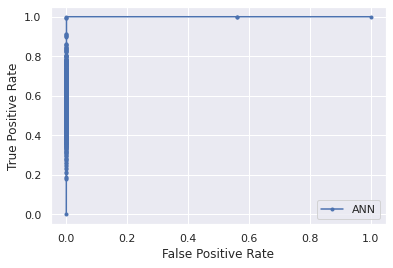

In [ ]:
ann_fpr, ann_tpr, _ = roc_curve(y_test, yhat_probsm)
pyplot.plot(ann_fpr, ann_tpr, marker='.', label='ANN')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

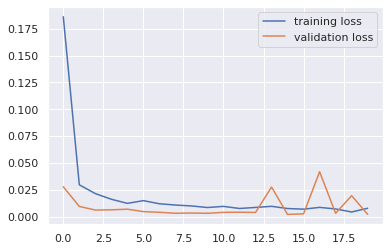

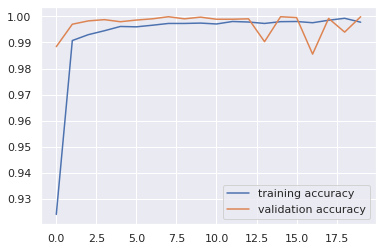

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()

plt.figure()
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

plt.show()